## Import Package

In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

## Load Dataset

In [159]:
len(pd.read_csv("../../Data/F.csv"))

12202

In [160]:
len(pd.read_csv("../../Data/GOOG.csv"))

4070

In [161]:
# collect spread ratio of two stocks as numpy array
close1= pd.read_csv("../../Data/GOOG.csv").iloc[-3500:-1, :]["Close"].values
close2 = pd.read_csv("../../Data/F.csv").iloc[-3500:-1, :]["Close"].values
spread = close1 / close2

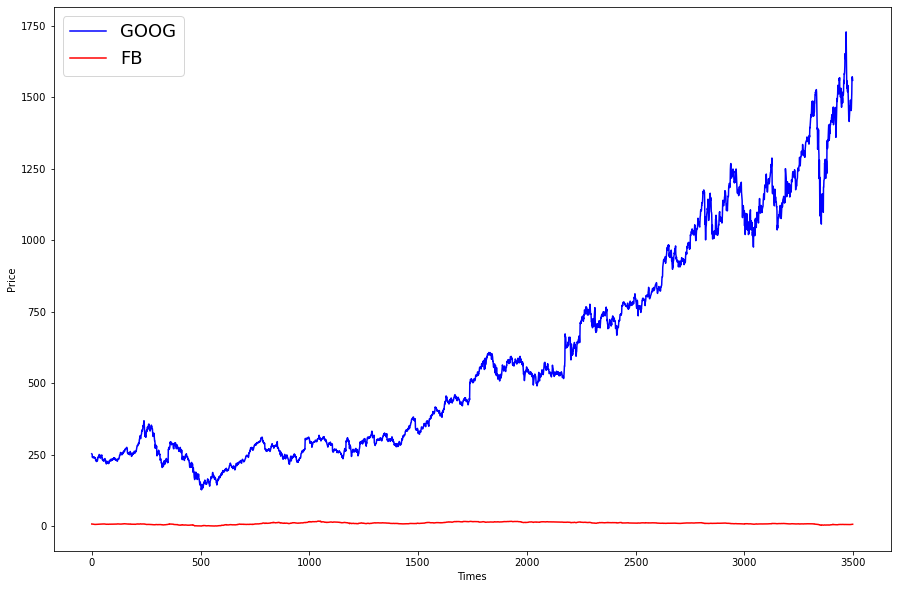

In [162]:
plt.figure(figsize=(15, 10))
plt.plot(close1, color="blue", label="GOOG")
plt.plot(close2, color="red", label="FB")
plt.legend(prop={"size":18})
plt.xlabel("Times")
plt.ylabel("Price")
plt.show()

In [163]:
spread, spread.shape

(array([ 29.658109  ,  29.39099744,  29.52548099, ..., 202.53608943,
        207.14398362, 204.61023688]),
 (3499,))

In [164]:
time = np.array(list(range(len(spread))))
series = spread

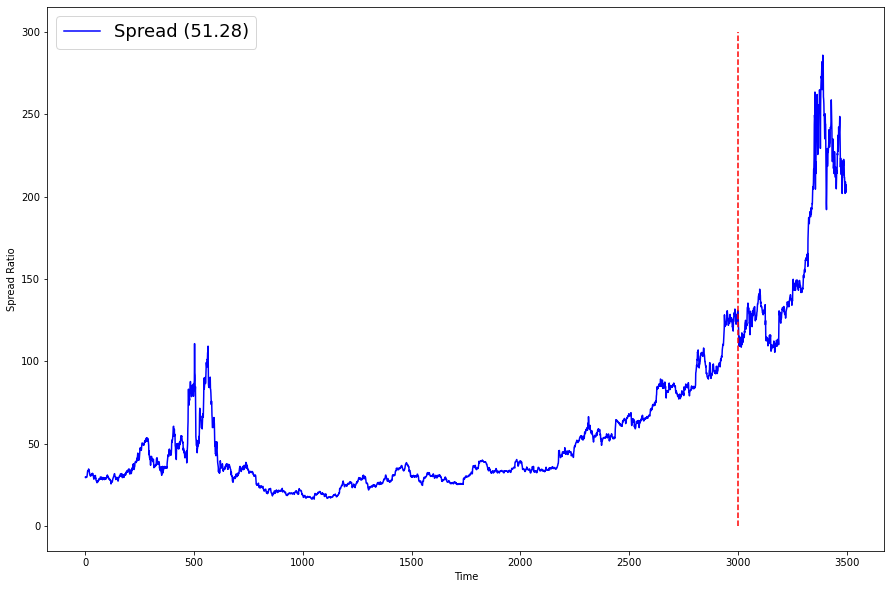

In [166]:
plt.figure(figsize=(15, 10))
plt.plot(time, series, color="blue", label="Spread ({})".format(round(series.std(), 2)))
plt.plot([3000, 3000], [0, 300], "--r",)
plt.legend(prop={"size": 18})
plt.xlabel("Time")
plt.ylabel("Spread Ratio")
plt.show()

In [167]:
# split dataset into train and validation part
time_train = time[:3000]
series_train = series[:3000]
series_train = np.reshape(series_train, (-1, 1))

time_validation = time[3000:]
series_validation = series[3000:]

In [168]:
series_train.shape, series_validation.shape

((3000, 1), (499,))

## Build Input Pipeline for Training

In [169]:
# convert numpy array to Tensorflow Dataset object
dataset = tf.data.Dataset.from_tensor_slices(series_train)
dataset

<TensorSliceDataset shapes: (1,), types: tf.float64>

In [170]:
# split dataset into many windows
dataset = dataset.window(size=21, shift=1, drop_remainder=True)
dataset

<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(1,), dtype=tf.float64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(1,), dtype=tf.float64, name=None), TensorShape([]))>

In [171]:
# convert each window to a batch
dataset = dataset.map(lambda window: window.batch(21))
dataset

<MapDataset shapes: DatasetSpec(TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(None, 1), dtype=tf.float64, name=None), TensorShape([]))>

In [172]:
# flatten each batch
dataset = dataset.flat_map(lambda batch: batch)
dataset

<FlatMapDataset shapes: (None, 1), types: tf.float64>

In [173]:
# shuffle the order of batch
dataset = dataset.shuffle(buffer_size=3000)
dataset

<ShuffleDataset shapes: (None, 1), types: tf.float64>

In [174]:
# split each batch into input and output
dataset = dataset.map(lambda batch: (batch[:-1], batch[-1]))
dataset

<MapDataset shapes: ((None, 1), (1,)), types: (tf.float64, tf.float64)>

In [175]:
# integrate 32 batchs/examples into a "batch" for training
dataset = dataset.batch(32)
dataset

<BatchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>

In [176]:
# prefatch Tensorflow Dataset object to enhance efficiency of training process
train_dataset = dataset.prefetch(1)
train_dataset

<PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>

In [177]:
for b in train_dataset:
    print(b)
    print()

(<tf.Tensor: shape=(32, 20, 1), dtype=float64, numpy=
array([[[104.23667787],
        [107.10226063],
        [108.27139763],
        [109.11151935],
        [110.38674484],
        [110.0165598 ],
        [109.70055092],
        [112.20738958],
        [115.13849093],
        [118.07757389],
        [120.12356949],
        [128.24367604],
        [124.72306143],
        [121.12611619],
        [121.24103685],
        [123.23333434],
        [123.60383306],
        [121.88346225],
        [122.11066999],
        [123.23610823]],

       [[ 44.07377243],
        [ 42.61399434],
        [ 40.69591935],
        [ 40.41402388],
        [ 46.36437397],
        [ 48.52899228],
        [ 50.03561242],
        [ 47.93883845],
        [ 49.67949298],
        [ 49.16467667],
        [ 50.11966495],
        [ 47.94917443],
        [ 46.96052417],
        [ 49.04088016],
        [ 49.10811132],
        [ 46.87846958],
        [ 48.34977965],
        [ 48.24018536],
        [ 51.04126537],
        

(<tf.Tensor: shape=(32, 20, 1), dtype=float64, numpy=
array([[[ 34.01864434],
        [ 35.3962276 ],
        [ 35.27555879],
        [ 36.24773602],
        [ 35.46336519],
        [ 33.73632011],
        [ 33.75954625],
        [ 33.65164335],
        [ 33.15543164],
        [ 33.33344738],
        [ 34.25786283],
        [ 34.81927374],
        [ 35.29023728],
        [ 34.51742837],
        [ 34.79534972],
        [ 36.15759888],
        [ 35.67269833],
        [ 36.1181323 ],
        [ 34.25742323],
        [ 34.39274186]],

       [[ 23.88170917],
        [ 23.8197273 ],
        [ 23.33334186],
        [ 23.77818401],
        [ 23.85919672],
        [ 24.12011918],
        [ 22.97723707],
        [ 22.5697081 ],
        [ 22.26078829],
        [ 22.35233492],
        [ 21.38198251],
        [ 22.05562807],
        [ 21.40597439],
        [ 21.5996498 ],
        [ 21.61934954],
        [ 21.66974393],
        [ 21.80070641],
        [ 22.39849314],
        [ 22.42330937],
        

(<tf.Tensor: shape=(32, 20, 1), dtype=float64, numpy=
array([[[ 80.67913026],
        [ 82.10087825],
        [ 81.55809859],
        [ 81.42682007],
        [ 80.42019042],
        [ 80.4724636 ],
        [ 80.02681531],
        [ 79.19879329],
        [ 78.67583835],
        [ 78.6527302 ],
        [ 79.55422861],
        [ 79.56058123],
        [ 78.42314434],
        [ 77.1331634 ],
        [ 77.5238881 ],
        [ 79.03681925],
        [ 79.38963211],
        [ 80.12614745],
        [ 78.84780976],
        [ 77.6166919 ]],

       [[ 17.40243733],
        [ 17.44777784],
        [ 17.60998322],
        [ 17.75478162],
        [ 17.72648317],
        [ 17.77242582],
        [ 17.66234899],
        [ 18.39906072],
        [ 18.55035522],
        [ 18.59838358],
        [ 18.65975047],
        [ 18.53375613],
        [ 18.87705336],
        [ 18.65218899],
        [ 19.01151161],
        [ 19.13414056],
        [ 18.85597982],
        [ 19.05216228],
        [ 19.42718223],
        

       [ 58.90767817]])>)

(<tf.Tensor: shape=(32, 20, 1), dtype=float64, numpy=
array([[[ 30.4783516 ],
        [ 30.41859309],
        [ 30.21605825],
        [ 29.23067976],
        [ 29.64107155],
        [ 29.20520833],
        [ 29.02165379],
        [ 28.39906059],
        [ 28.78283455],
        [ 28.54992202],
        [ 28.52482145],
        [ 27.78176834],
        [ 27.99387497],
        [ 27.89725522],
        [ 27.77760275],
        [ 26.40962135],
        [ 25.60548283],
        [ 26.8747234 ],
        [ 26.78089749],
        [ 26.95993786]],

       [[ 28.5038116 ],
        [ 28.88637   ],
        [ 29.21988812],
        [ 29.73925   ],
        [ 29.85217796],
        [ 30.54271366],
        [ 31.10123502],
        [ 31.25391634],
        [ 31.83229888],
        [ 31.16292488],
        [ 30.32324655],
        [ 30.22145853],
        [ 29.40147792],
        [ 28.92391917],
        [ 28.25117074],
        [ 28.99865107],
        [ 29.61788821],
        [ 28.67187607],
     

## Define Model

In [178]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(20, 1)))
# model.add(keras.layers.Dense(units=128, input_shape=(20, 1), activation="relu"))
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

In [179]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 20, 32)            128       
_________________________________________________________________
lstm_6 (LSTM)                (None, 20, 64)            24832     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 60,895
Trainable params: 60,895
Non-trainable params: 0
__________________________________________________

In [180]:
model.compile(loss="mse", optimizer=keras.optimizers.Adam(), metrics=["mae"])

## Train Model

In [ ]:
model.fit(x=train_dataset, epochs=500, verbose=1)

Epoch 1/500
94/94 [==============================] - 3s 36ms/step - loss: 1845.2440 - mae: 34.2386
Epoch 2/500
94/94 [==============================] - 1s 8ms/step - loss: 534.3888 - mae: 16.3368
Epoch 3/500
94/94 [==============================] - 1s 8ms/step - loss: 72.7201 - mae: 4.1802
Epoch 4/500
94/94 [==============================] - 1s 7ms/step - loss: 16.3709 - mae: 2.6522
Epoch 5/500
94/94 [==============================] - 1s 8ms/step - loss: 6.0889 - mae: 1.6289
Epoch 6/500
94/94 [==============================] - 1s 8ms/step - loss: 6.6697 - mae: 1.8226
Epoch 7/500
94/94 [==============================] - 1s 7ms/step - loss: 3.0401 - mae: 1.0787
Epoch 8/500
94/94 [==============================] - 1s 7ms/step - loss: 4.1570 - mae: 1.3304
Epoch 9/500
94/94 [==============================] - 1s 7ms/step - loss: 3.9724 - mae: 1.3070
Epoch 10/500
94/94 [==============================] - 1s 8ms/step - loss: 3.4137 - mae: 1.1816
Epoch 11/500
94/94 [=============================

In [ ]:
ans = []

for idx in range(3000, len(series)):
    arr = series[idx-20:idx]
    arr = np.reshape(arr, (1, 20, 1))
    out = model.predict(arr)[0]
    ans.append(out)

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(time_validation, ans, color="blue", label="Pred ({})".format(round(mean_absolute_error(ans, series_validation), 4)))
plt.plot(time_validation, series_validation, color="red", label="True")
plt.legend(prop={"size":18})
plt.show()